In [1]:
!pip install janome


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 56.1 MB/s eta 0:00:00


In [2]:
from janome.tokenizer import Tokenizer

t = Tokenizer()

for token in t.tokenize('すもももももももものうち'):
	print(token)

すもも	名詞,一般,*,*,*,*,すもも,スモモ,スモモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ


In [3]:
from janome.tokenizer import Tokenizer

t = Tokenizer()

for token in t.tokenize('うどんを作ろう'):
  print(token.part_of_speech)
  print(token.surface)
  print(token.base_form)

名詞,一般,*,*
うどん
うどん
助詞,格助詞,一般,*
を
を
動詞,自立,*,*
作ろ
作る
助動詞,*,*,*
う
う


In [4]:
from janome.tokenizer import Tokenizer

t = Tokenizer()

for token in t.tokenize('もももももももものうち'):
	hinshi = token.part_of_speech.split(',')
	if hinshi[0] =='名詞':
	   	print(token)

もも	名詞,一般,*,*,*,*,もも,モモ,モモ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ


In [5]:
from janome.tokenizer import Tokenizer

t = Tokenizer()
words=[]
for token in t.tokenize('この讃岐うどんは麺がしっかりしていて美味しい。\
                                出汁もきいてる。讃岐うどん最高!'):
	hinshi = token.part_of_speech.split(',')
	if hinshi[0] =='名詞' :
	   	words.append(token.base_form)

print(words)

['讃岐', 'うどん', '麺', '出汁', '讃岐', 'うどん', '最高', '!']


In [6]:
from janome.tokenizer import Tokenizer
import collections
t = Tokenizer()
words=[]
for token in t.tokenize('この讃岐うどんは麺がしっかりしていて美味しい。\
                                出汁もきいてる。讃岐うどん最高!'):
	hinshi = token.part_of_speech.split(',')
	if hinshi[0] =='名詞' :
	   	words.append(token.base_form)

print(words)
word_counter=collections.Counter(words)
print(word_counter)

['讃岐', 'うどん', '麺', '出汁', '讃岐', 'うどん', '最高', '!']
Counter({'讃岐': 2, 'うどん': 2, '麺': 1, '出汁': 1, '最高': 1, '!': 1})


In [7]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=67f8c74d8effb948cba5000de6c8772a5e66126058ef85a8b40201f411cba415
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


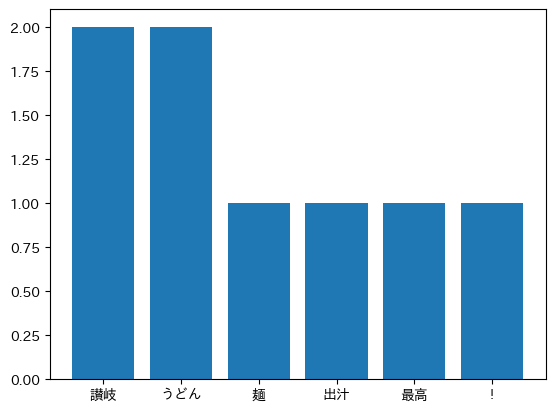

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib

value_list=[]
key_list=[]
for k,v in word_counter.items():

	key_list.append(k)
	value_list.append(v)

plt.bar(np.arange(len(value_list)), np.array(value_list), tick_label=key_list, align="center")
plt.xticks(np.arange(len(value_list)),key_list)

plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[Text(0, 0, 'スープ'),
 Text(1, 0, 'チャーシュー'),
 Text(2, 0, '麺'),
 Text(3, 0, '香り'),
 Text(4, 0, 'メンマ'),
 Text(5, 0, 'AFURI'),
 Text(6, 0, '柚子'),
 Text(7, 0, '塩'),
 Text(8, 0, 'ー'),
 Text(9, 0, 'めん'),
 Text(10, 0, '味'),
 Text(11, 0, '鶏'),
 Text(12, 0, '水菜'),
 Text(13, 0, '海苔'),
 Text(14, 0, '感じ'),
 Text(15, 0, 'メニュー'),
 Text(16, 0, '食券'),
 Text(17, 0, '席'),
 Text(18, 0, '風味'),
 Text(19, 0, 'ごはん'),
 Text(20, 0, '醤油'),
 Text(21, 0, 'カウンター')]

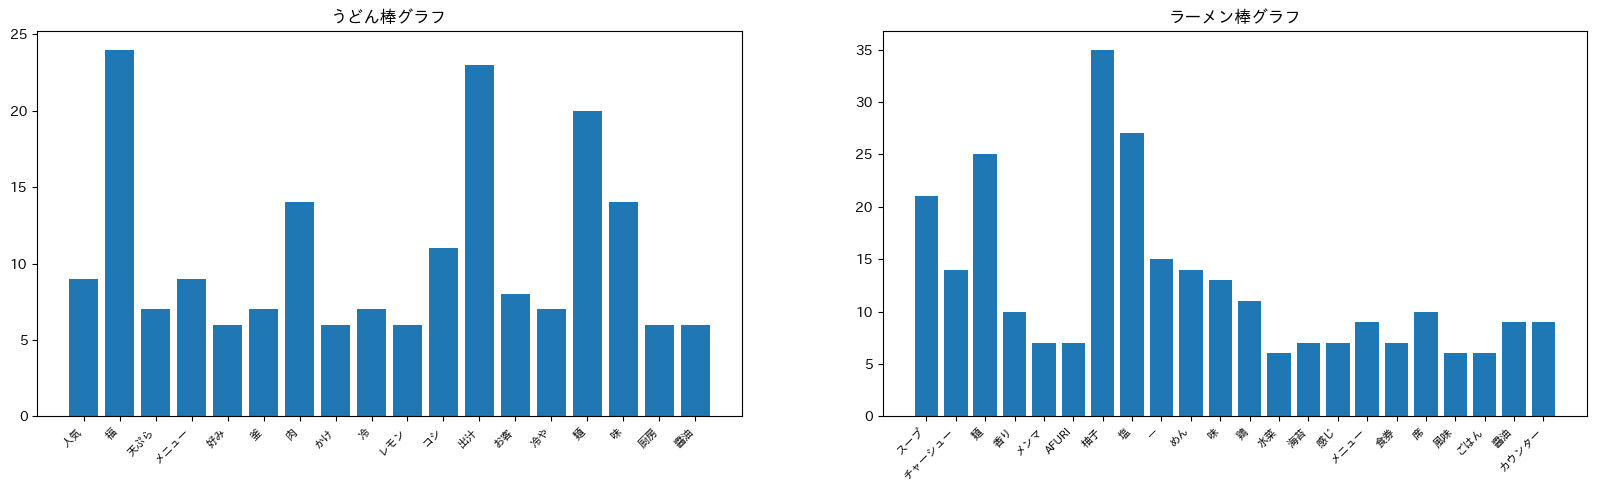

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from janome.tokenizer import Tokenizer
import collections
import japanize_matplotlib
from pylab import rcParams


rcParams['figure.figsize'] = 20,5

#tabelog_df = pd.read_csv('/content/drive/MyDrive/saitama_pref_python/programs/data/tabelog.csv', encoding='CP932')
tabelog_df = pd.read_csv('tabelog_udon.csv', encoding='CP932')
udon_reviews=''
ramen_reviews=''
for label,review in zip(tabelog_df['label'],tabelog_df['text']):

	if 'うどん' in label:
		udon_reviews+=review
	elif 'ラーメン' in label:
		ramen_reviews+=review


t = Tokenizer()

def count_words(reviews):
	word_list=[]
	for token in t.tokenize(reviews):
		hinshi = token.part_of_speech.split(',')
		if hinshi[0] =='名詞' and hinshi[1] =='一般' and token.surface != 'うどん' and token.surface !='ラーメン' and token.surface.find('店')== -1:
			word_list.append(token.base_form)
	word_counter = collections.Counter(word_list)
	value_list=[]
	key_list=[]
	for k,v in word_counter.items():

		if v >5 :
			key_list.append(k)
			value_list.append(v)
	return key_list,value_list

udon_key,udon_val = count_words(udon_reviews)
ramen_key, ramen_val = count_words(ramen_reviews)

fig = plt.figure()
ax1=fig.add_subplot(121,title='うどん棒グラフ')
ax1.bar(np.arange(len(udon_val)), np.array(udon_val), tick_label=udon_key, align="center")
ax1.set_xticks(np.arange(len(udon_val)))
ax1.set_xticklabels(udon_key, rotation=45, ha='right',fontsize=8)
#ax1.xticks(np.arange(len(udon_val)),udon_key)
ax2=fig.add_subplot(122,title='ラーメン棒グラフ')
ax2.bar(np.arange(len(ramen_val)), np.array(ramen_val), tick_label=ramen_key, align="center")
ax2.set_xticks(np.arange(len(ramen_val)))
ax2.set_xticklabels(ramen_key, rotation=45, ha='right',fontsize=8)